In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dataset = fetch_california_housing()

In [3]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

### Simple Linear Regressor : X_1 to Y

In [5]:
x = dataset['data'][..., 0:1]
y = dataset['target']

Text(0, 0.5, 'Median Household value')

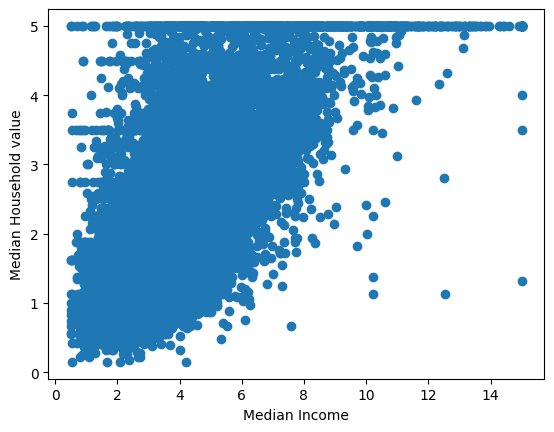

In [6]:
plt.scatter(x[..., 0], y)
plt.xlabel('Median Income')
plt.ylabel('Median Household value')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [8]:
print(x_train.shape, x_test.shape)

(16512, 1) (4128, 1)


In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'Median House Value')

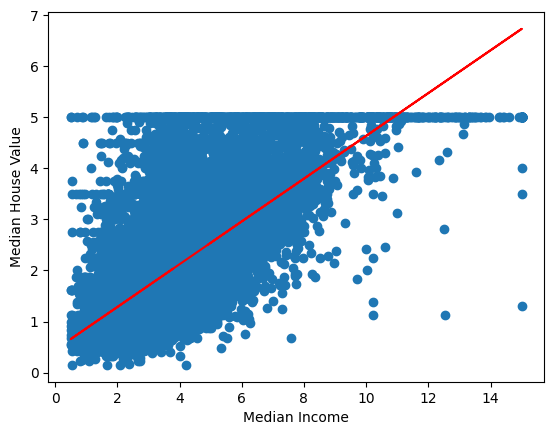

In [12]:
plt.scatter(x[..., 0], y)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

In [13]:
# y = wx + b

w = model.coef_
b = model.intercept_
print(w, b)

[0.41911868] 0.44637426650854484


In [14]:
print(y_pred[0], w*x_test[0] + b)

2.5105337570233752 [2.51053376]


In [15]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.4858720293671639 0.7042050071704521


### Multi-linear Regression

In [16]:
x = dataset['data']
y = dataset['target']

In [17]:
print(x.shape)

(20640, 8)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [20]:
w = [0]* 8
for i in range(8):
  w[i]= round(model.coef_[i],4)

b = model.intercept_
print(w, b)

[0.439, 0.0096, -0.1128, 0.6723, -0.0, -0.0035, -0.4218, -0.4352] -37.01203685776091


In [21]:
"""
#Inference
MedInc -- Median Income has 43.6% positive correlation with Median House value modrately correlated.
          This is expected but correlation is moderate
HouseAge  -- House age has negligible positive correlation with Median House Value. This is surprising since we expect a negative correlation
AveRooms  -- Average rooms have minor negative correlatwion with Median House Value. This is counter intuitive since housing value increases
             number of rooms
AveBedrms -- However, As expected Average bedrooms has moderately postive Correlation with Median housing value
Population -- Pppulation has negligle but 0 correlation with Median Housing Value. This is counter intuitive since as population increases
              we expect demand for housing to increase and hence a strong postive correlation
AveOccup  -- Average number of household members has negligible but negative correlation with Housing value.
Latitude  -- Latitude has moderately negative correlation with Median House Value. People prefer inland over coastal areas.
Longitude  -- Latitude has moderately negative correlation with Median House Value. There is a preference
               for Southern counties over Northern counties.
"""

'\n#Inference\nMedInc -- Median Income has 43.6% positive correlation with Median House value modrately correlated.\n          This is expected but correlation is moderate\nHouseAge  -- House age has negligible positive correlation with Median House Value. This is surprising since we expect a negative correlation\nAveRooms  -- Average rooms have minor negative correlatwion with Median House Value. This is counter intuitive since housing value increases\n             number of rooms\nAveBedrms -- However, As expected Average bedrooms has moderately postive Correlation with Median housing value\nPopulation -- Pppulation has negligle but 0 correlation with Median Housing Value. This is counter intuitive since as population increases\n              we expect demand for housing to increase and hence a strong postive correlation\nAveOccup  -- Average number of household members has negligible but negative correlation with Housing value.\nLatitude  -- Latitude has moderately negative correlat

In [22]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6099072493309466 0.5173796650970794
